In [34]:
import numpy as np
import pandas as pd

In [35]:
train_data = pd.read_csv("/kaggle/input/goud-preprocessed-ML/ML_train_preprocessed.csv")
val_data = pd.read_csv("/kaggle/input/goud-preprocessed-ML/ML_validation_preprocessed.csv")
test_data = pd.read_csv("/kaggle/input/goud-preprocessed-ML/ML_test_preprocessed.csv")

In [36]:
pd.set_option('display.max_colwidth', None)

In [37]:
# train_data.drop_duplicates(inplace=True, ignore_index=True)
# val_data.drop_duplicates(inplace=True, ignore_index=True)
# test_data.drop_duplicates(inplace=True, ignore_index=True)

In [38]:
train_data

,headline,categories
0,حكم ضد وزاره اعماره بتعويض قدره 13 مليار لشركه,"('جورنالات بلادي',)"
1,جلسه خاصه بين مدرب الاهلي ومهاجم الاسود ازارو,"('كود سبور',)"
2,اعتقال مهاجم الريال رونالدو في فرنسا وها علاش صور,"('كود سبور',)"
3,الاسود المحليين يستعدون للمربع الذهبي,"('كود سبور',)"
4,الجديد ريحه ديال المازوط وليصونس لعشاق صوكان وطوموبيلات,"('تبركيك',)"
...,...,...
62005,واش دخلو الصهد امحند العنصر ل كود مزال مقررت نترشح للامانه العامه ديال الحركه الشعبيه وها وقتاش غادي نقرر,"('تبركيك',)"
62006,الفنانه المغربيه ابتسام تسكت مطلوبه بوجده,"('الزين والحداكة',)"
62007,من بعد 15 العام تصوير تتمه فيلم ماروك لي كان نوض روينه,"('ميديا وثقافة',)"
62008,جورنالات بلادي1 غموض يلف صرف 5 ملايير بمؤسسه الاعمال الاجتماعيه بوزاره الصحه وامن طنجه يعتقل زعيم عصابه بتهمه اختطاف زوجين واحتجازهما للمطالبه بفديه,"('جورنالات بلادي',)"


<AxesSubplot:xlabel='categories'>

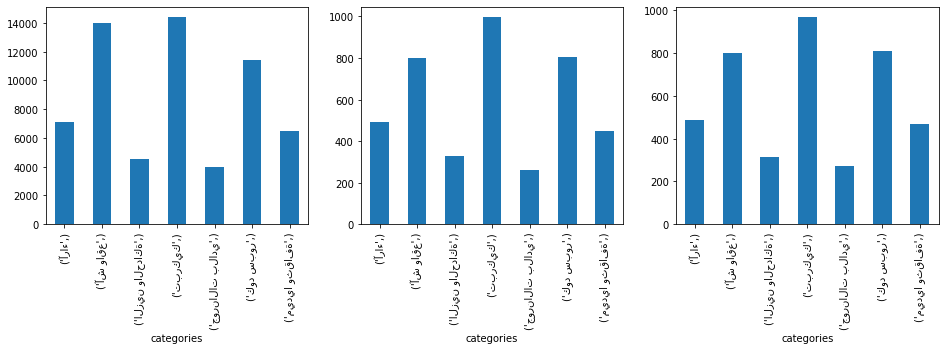

In [39]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(16,4))
train_data.groupby('categories')['headline'].count().plot.bar(ax=axs[0])
val_data.groupby('categories')['headline'].count().plot.bar(ax=axs[1])
test_data.groupby('categories')['headline'].count().plot.bar(ax=axs[2])

In [40]:
from sklearn.utils import resample

def downsample(data, column, n_samples):

  column_df = data[data["categories"] == column]

  data.drop(data[data["categories"] == column].index, inplace=True)

  column_downsampled = resample(column_df, replace=True, n_samples=n_samples, random_state=42)

  data = pd.concat([column_downsampled, data], ignore_index=True).sort_index()

  return data

In [41]:
# for categ in train_data["categories"].unique():
#   train_data = downsample(train_data, categ, 4000)

In [42]:
# for categ in val_data["categories"].unique():
#   val_data = downsample(val_data, categ, 100)

In [43]:
# for categ in test_data["categories"].unique():
#   test_data = downsample(test_data, categ, 100)

<AxesSubplot:xlabel='categories'>

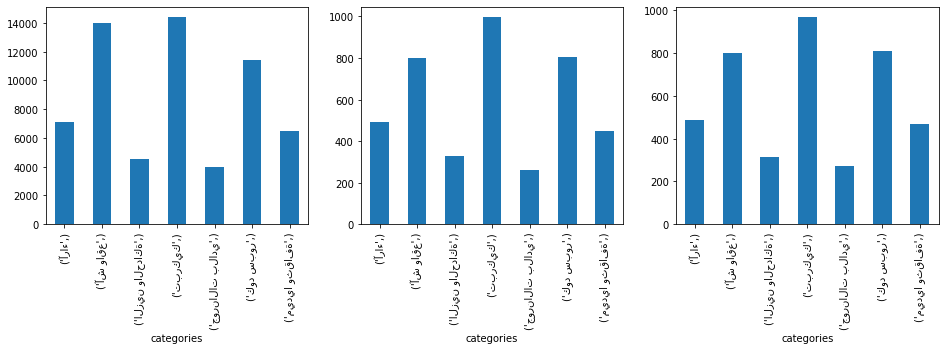

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(16,4))
train_data.groupby('categories')['headline'].count().plot.bar(ax=axs[0])
val_data.groupby('categories')['headline'].count().plot.bar(ax=axs[1])
test_data.groupby('categories')['headline'].count().plot.bar(ax=axs[2])

In [45]:
def categ2label(categ):
  labels_dict = {
      "('جورنالات بلادي',)" : 0,
      "('كود سبور',)" : 1,
      "('تبركيك',)" : 2,
      "('آراء',)" : 3,
      "('آش واقع',)" : 4,
      "('ميديا وثقافة',)" : 5,
      "('الزين والحداكة',)" : 6,
  }
  return labels_dict[categ]

In [46]:
train_data["label"] = train_data["categories"].apply(categ2label)
val_data["label"] = val_data["categories"].apply(categ2label)
test_data["label"] = test_data["categories"].apply(categ2label)

In [47]:
train_data = train_data.sample(n=60000).reset_index(drop=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [48]:
train_data

,headline,categories,label
0,الحكره علي المغربيات فدول الخليج باقي متسمره منع مغربيات من دخول الاردن والسبب مكاينش المحرم,"('الزين والحداكة',)",6
1,جورنالات بلادي 1 منعشون عقاريون يقاضون العمران والصبيحي متهم بالترامي علي ارض مساحتها 50 هكتارا,"('جورنالات بلادي',)",0
2,عصابه اجراميه تروع عاصمه الغرب,"('آش واقع',)",4
3,تعرمات المشاكل علي امزازي فالتعليم القطاع كيغلي ودائره الاحتجاجات كتوسع كل نهار,"('آش واقع',)",4
4,ردو البال صفحه فايك علي الفايسبوك كيقولو ان التسجيل للحصول علي فاكسان كورونا بدا و وزاره الصحه مشات للقضاء,"('ميديا وثقافة',)",5
...,...,...,...
59995,الزاكي وفاخر مطلوبين في الجامعه,"('كود سبور',)",1
59996,مدرب مولوديه الجزائر غادي نربحو الرجاء باش ندخلو التاريخ,"('كود سبور',)",1
59997,مغربيه ورطات احمد بدير في المهرجان الدولي للسينما,"('ميديا وثقافة',)",5
59998,نيويورك تايمز محمد السادس كول فتونس كيتجول بالتيشورت وبطيء في تنفيذ وعود الديموقراطيه في عهده قمع للحريات واعتقال الصحافيين وديموقراطيته ماكياج,"('ميديا وثقافة',)",5


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features_train = tfidf.fit_transform(train_data['headline']).toarray()
labels_train = train_data["label"]

features_val = tfidf.transform(val_data['headline']).toarray()
labels_val = val_data["label"]

features_test = tfidf.transform(test_data['headline']).toarray()
labels_test = test_data["label"]

print(features_train.shape, features_val.shape, features_test.shape)
print(labels_train.shape, labels_val.shape, labels_test.shape)

(60000, 603995) (4137, 603995) (4114, 603995)
(60000,) (4137,) (4114,)


In [50]:
# for incremental learning

features_train = features_train.reshape(-1,600,features_train.shape[1])

labels_train = labels_train.values.reshape(-1,600)

features_train.shape, labels_train.shape
# labels_train, labels_val, labels_test = labels_train.reshape(-1,800), labels_val.reshape() labels_test.reshape(-1,800)

((100, 600, 603995), (100, 600))

<AxesSubplot:>

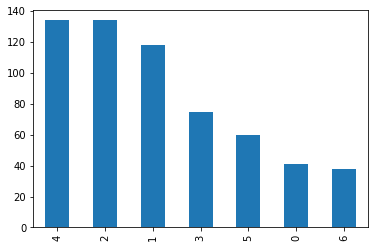

In [51]:
pd.Series(labels_train[0]).value_counts().plot.bar()

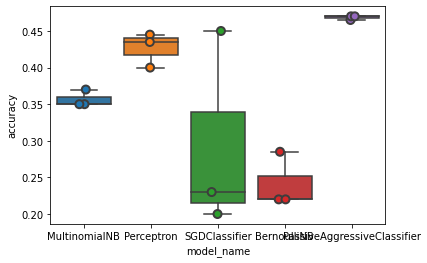

In [52]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier, SGDClassifier
from sklearn.model_selection import cross_val_score
models = [
    MultinomialNB(),
    Perceptron(),
    SGDClassifier(),
    BernoulliNB(),
    PassiveAggressiveClassifier()
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_train[0], labels_train[0], scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [53]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

model_name
PassiveAggressiveClassifier    0.468333
Perceptron                     0.426667
MultinomialNB                  0.356667
SGDClassifier                  0.293333
BernoulliNB                    0.241667
Name: accuracy, dtype: float64

In [54]:
from sklearn.naive_bayes import MultinomialNB

M_NB_model = MultinomialNB()
for i in range(0, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    M_NB_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [55]:
from sklearn.metrics import classification_report

y_pred = M_NB_model.predict(features_test)
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.19      0.31       270
           1       0.87      0.87      0.87       809
           2       0.45      0.83      0.58       968
           3       0.93      0.34      0.49       486
           4       0.53      0.82      0.64       800
           5       0.93      0.09      0.16       469
           6       0.86      0.02      0.04       312

    accuracy                           0.59      4114
   macro avg       0.80      0.45      0.44      4114
weighted avg       0.73      0.59      0.53      4114



<AxesSubplot:>

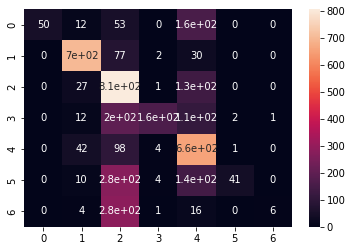

In [56]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_test, y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [57]:
from sklearn.linear_model import PassiveAggressiveClassifier

PAC_model = PassiveAggressiveClassifier()
for i in range(0, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    PAC_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [58]:
from sklearn.metrics import classification_report

y_pred = PAC_model.predict(features_test)
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.54      0.68       270
           1       0.83      0.93      0.88       809
           2       0.70      0.54      0.61       968
           3       0.86      0.60      0.71       486
           4       0.55      0.83      0.67       800
           5       0.63      0.63      0.63       469
           6       0.60      0.57      0.58       312

    accuracy                           0.69      4114
   macro avg       0.73      0.66      0.68      4114
weighted avg       0.71      0.69      0.69      4114



<AxesSubplot:>

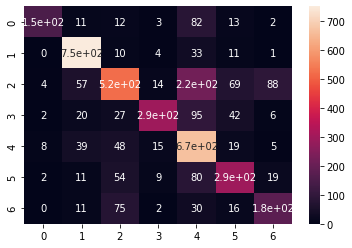

In [59]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_test, y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [60]:
from sklearn.linear_model import Perceptron

Per_model = Perceptron()
for i in range(0, features_train.shape[0]):
    features_batch, labels_batch = features_train[i], labels_train[i]
    Per_model.partial_fit(features_batch, labels_batch, classes=list(range(7)))

In [61]:
from sklearn.metrics import classification_report

y_pred = Per_model.predict(features_test)
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.52      0.67       270
           1       0.90      0.77      0.83       809
           2       0.76      0.38      0.50       968
           3       0.85      0.59      0.69       486
           4       0.55      0.83      0.66       800
           5       0.36      0.81      0.50       469
           6       0.64      0.45      0.52       312

    accuracy                           0.63      4114
   macro avg       0.71      0.62      0.63      4114
weighted avg       0.71      0.63      0.63      4114



<AxesSubplot:>

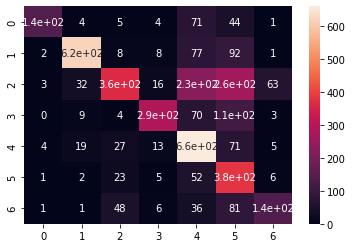

In [62]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels_test, y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [63]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# SVC_model = SVC()

# grid_param = {
#     'C': [0.1,10,10],
#     'kernel': ['linear','poly','rbf','sigmoid'],
#     'gamma': ['scale', 'auto'],
# }
# gd_sr = GridSearchCV(estimator=SVC_model, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
# gd_sr.fit(features,labels)
# best_parameters = gd_sr.best_params_
# print(best_parameters)
# best_score = gd_sr.best_score_
# print(best_score)

In [64]:
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import cross_val_score

# model = LinearSVC()
# entries = []
# model_name = model.__class__.__name__
# accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=3)
# for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])